In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
import calendar
import pandas as pd
from functions import *
import statistics as st
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats
import seaborn as sns

file_path=r'C:\\Users\\lehri\\Documents\\GitHub\\dust_solar_power\\'

In [2]:
def get_ed_table(elements):
    d = {
        'Dust (Trad)':[],
        'Dust (Inv)':[],
        'PM10':[],
        'PM2.5':[],
        'Wind spd':[],
        'Normal Dist':[]
    }
    df=pd.DataFrame(d)
    cordf=df.corr()
    for i in range(len(elements)):
        for j  in range(len(elements)):
            cordf.iloc[i,j]=stats.energy_distance(elements[i],elements[j])
    return cordf



In [3]:
%store -r tceq_pm10_export
%store -r tceq_pm25_export
%store -r tceq_pm10_monthly_all
%store -r tceq_pm25_monthly_all
%store -r wind_df_2019
%store -r wind_df_2020
%store -r wind_df_2021

wind_years=[wind_df_2019,wind_df_2020,wind_df_2021]
wind_years_valuesonly=np.array([])
wind_years_valuesonly=np.concatenate((wind_years_valuesonly,wind_df_2019.values))
wind_years_valuesonly=np.concatenate((wind_years_valuesonly,wind_df_2020.values))
wind_years_valuesonly=np.concatenate((wind_years_valuesonly,wind_df_2021.values))

In [4]:
%store -r dust_score_trad_monthly_mean_all_years
%store -r dust_score_inv_monthly_mean_all_years
%store -r dust_score_trad_daily_mean_all_years
%store -r dust_score_inv_daily_mean_all_years

In [5]:
%store -r dust_score_trad_nocloud
%store -r dust_score_inv_nocloud

In [6]:
%store -r ellipse_inv_hourly
%store -r ellipse_trad_hourly

In [7]:
'''
ellipse_inv_hourly_totals=[]
ellipse_inv_hourly_totals=np.append(ellipse_inv_hourly_totals,ellipse_inv_hourly[0])
ellipse_inv_hourly_totals=np.append(ellipse_inv_hourly_totals,ellipse_inv_hourly[1])
ellipse_inv_hourly_totals=np.append(ellipse_inv_hourly_totals,ellipse_inv_hourly[2])

ellipse_trad_hourly_totals=[]
ellipse_trad_hourly_totals=np.append(ellipse_trad_hourly_totals,ellipse_trad_hourly[0])
ellipse_trad_hourly_totals=np.append(ellipse_trad_hourly_totals,ellipse_trad_hourly[1])
ellipse_trad_hourly_totals=np.append(ellipse_trad_hourly_totals,ellipse_trad_hourly[2])
'''

'\nellipse_inv_hourly_totals=[]\nellipse_inv_hourly_totals=np.append(ellipse_inv_hourly_totals,ellipse_inv_hourly[0])\nellipse_inv_hourly_totals=np.append(ellipse_inv_hourly_totals,ellipse_inv_hourly[1])\nellipse_inv_hourly_totals=np.append(ellipse_inv_hourly_totals,ellipse_inv_hourly[2])\n\nellipse_trad_hourly_totals=[]\nellipse_trad_hourly_totals=np.append(ellipse_trad_hourly_totals,ellipse_trad_hourly[0])\nellipse_trad_hourly_totals=np.append(ellipse_trad_hourly_totals,ellipse_trad_hourly[1])\nellipse_trad_hourly_totals=np.append(ellipse_trad_hourly_totals,ellipse_trad_hourly[2])\n'

In [8]:
dust_score_inv_nocloud_totals=[]
dust_score_inv_nocloud_totals=np.append(dust_score_inv_nocloud_totals,dust_score_inv_nocloud[0])
dust_score_inv_nocloud_totals=np.append(dust_score_inv_nocloud_totals,dust_score_inv_nocloud[1])
dust_score_inv_nocloud_totals=np.append(dust_score_inv_nocloud_totals,dust_score_inv_nocloud[2])

dust_score_trad_nocloud_totals=[]
dust_score_trad_nocloud_totals=np.append(dust_score_trad_nocloud_totals,dust_score_trad_nocloud[0])
dust_score_trad_nocloud_totals=np.append(dust_score_trad_nocloud_totals,dust_score_trad_nocloud[1])
dust_score_trad_nocloud_totals=np.append(dust_score_trad_nocloud_totals,dust_score_trad_nocloud[2])

In [9]:
dust_score_inv_nocloud_totals_nonan=dust_score_inv_nocloud_totals[~np.isnan(dust_score_inv_nocloud_totals)]
dust_score_trad_nocloud_totals_nonan=dust_score_trad_nocloud_totals[~np.isnan(dust_score_trad_nocloud_totals)]

In [10]:
ellipse_inv_hourly_totals=dust_score_inv_nocloud_totals_nonan
ellipse_trad_hourly_totals=dust_score_trad_nocloud_totals_nonan

In [11]:
'''
Seasonality of Data, following ranges were used:
spring (March–May), summer (June–August), fall (September–November) and winter (December–February)
'''

'\nSeasonality of Data, following ranges were used:\nspring (March–May), summer (June–August), fall (September–November) and winter (December–February)\n'

In [12]:
wind_all=np.append(wind_df_2019.values,wind_df_2020.values)
wind_all=np.append(wind_all,wind_df_2021.values)

In [13]:
#we want to compare the hourly pm data with the hourly wind data
tceq_pm10_all=np.hstack(tceq_pm10_export)
tceq_pm25_all=np.hstack(tceq_pm25_export)
#the nans are already removed, but in case that changes use below
#tceq_pm10_all=tceq_pm10_all[~np.isnan(tceq_pm10_all)]
#tceq_pm25_all=tceq_pm25_all[~np.isnan(tceq_pm25_all)]
#Make sure negative values are removed
tceq_pm10_all=tceq_pm10_all[tceq_pm10_all>0]
tceq_pm25_all=tceq_pm25_all[tceq_pm25_all>0]

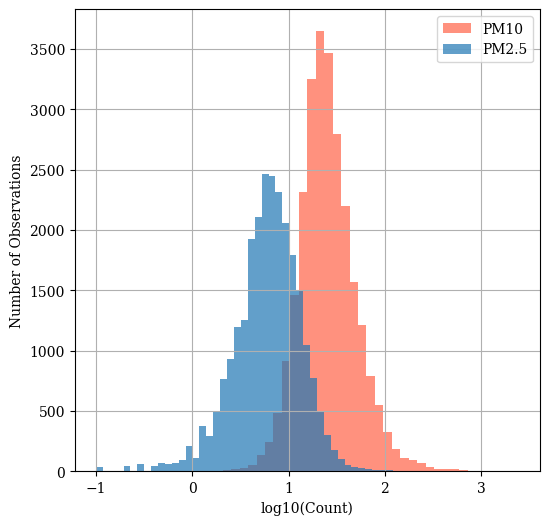

In [14]:
fig,ax=plt.subplots(figsize=(6,6))
pm10_log_transform=np.log10(tceq_pm10_all)
pm25_log_transform=np.log10(tceq_pm25_all)
ax.set_ylabel('Number of Observations')
ax.set_xlabel('log10(Count)')
ax.hist(pm10_log_transform, bins=50, label='PM10',color='tomato', alpha=0.7)
ax.hist(pm25_log_transform, bins=50, label='PM2.5', alpha=0.7)
ax.legend()
ax.grid()

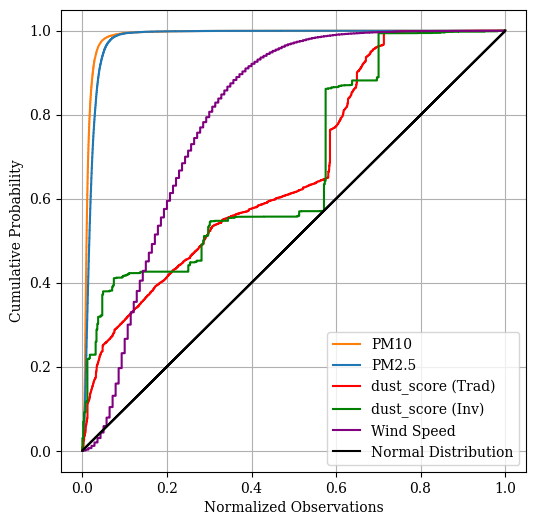

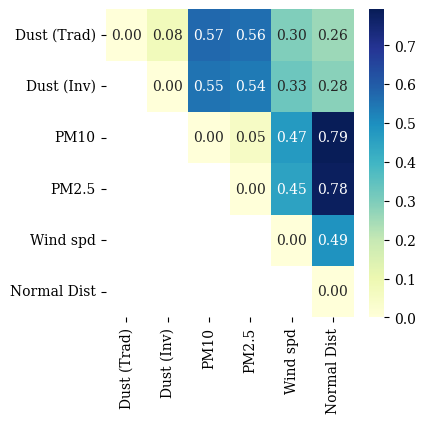

In [15]:
## ECDFs INVERTED and TRADITIONAL WIND DUSTSCORE SAMPLING METHODS for entirety of study period
fig,ax=plt.subplots(figsize=(6,6))
#normalize all data
dust_trad_norm=normalize(ellipse_trad_hourly_totals)
dust_inv_norm=normalize(ellipse_inv_hourly_totals)
tceq_cams49_pm10_norm = normalize(tceq_pm10_all)
tceq_cams49_pm25_norm = normalize(tceq_pm25_all)

wind_all_norm=normalize(wind_all)

ecdf1 = ECDF(tceq_cams49_pm10_norm)
ecdf2 = ECDF(tceq_cams49_pm25_norm)
ecdf3=ECDF(dust_trad_norm)
ecdf4=ECDF(dust_inv_norm)
ecdf5=ECDF(wind_all_norm)
ax.step(ecdf1.x, ecdf1.y, where='post',label='PM10',color='tab:orange')
ax.step(ecdf2.x, ecdf2.y, where='post', label='PM2.5',color='tab:blue')
ax.step(ecdf3.x, ecdf3.y, where='post', label='dust_score (Trad)',color='red')
ax.step(ecdf4.x, ecdf4.y, where='post', label='dust_score (Inv)',color='green')
ax.step(ecdf5.x, ecdf5.y, where='post', label='Wind Speed',color='purple')
x=normalize(np.linspace(0,100,1000))
ecdf_normdist = ECDF(x)
ax.step(ecdf_normdist.x, ecdf_normdist.y, where='post', label='Normal Distribution', color='black')

ax.set_ylabel("Cumulative Probability")
ax.set_xlabel("Normalized Observations")
    

ax.grid()
ax.legend()
fig2,ax2=plt.subplots(figsize=(4,4))
elements=[dust_trad_norm,dust_inv_norm,tceq_cams49_pm10_norm,tceq_cams49_pm25_norm,wind_all_norm,x]
df_corr_table=get_ed_table(elements)
corr_mask_matrix = np.tril(df_corr_table)
ax2=sns.heatmap(df_corr_table, annot=True, mask=corr_mask_matrix, fmt='.2f',cmap="YlGnBu")


Stats for alld data in Year  2019
Stats for alld data in Year  2020
Stats for alld data in Year  2021


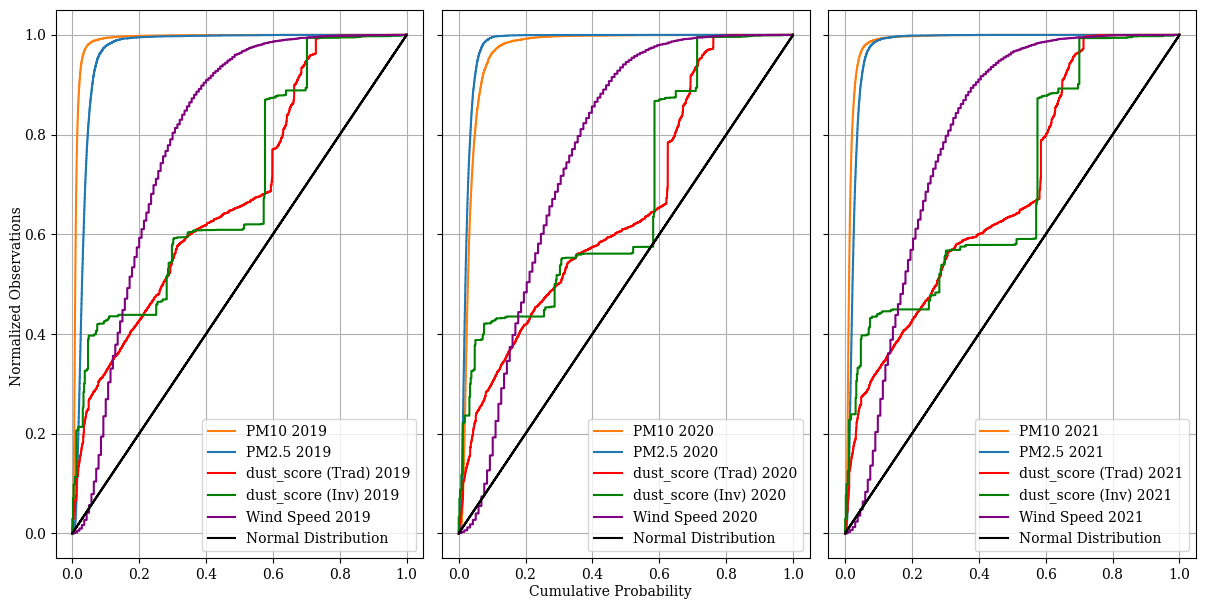

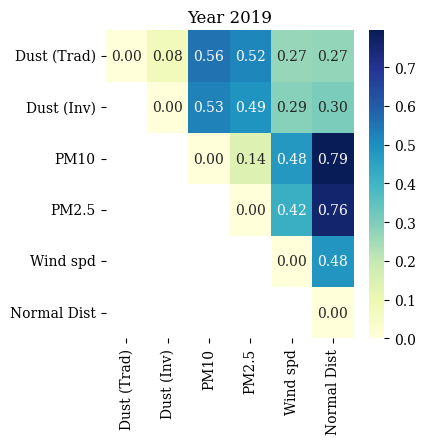

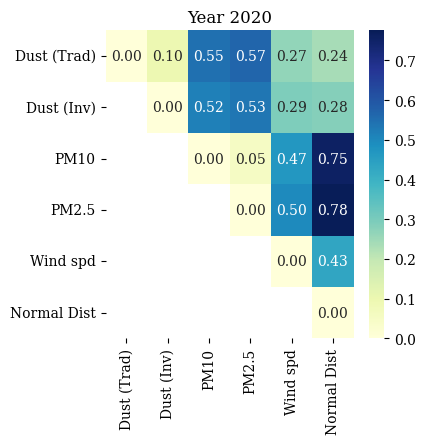

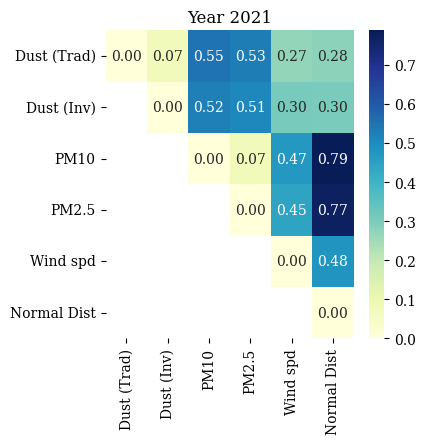

In [16]:
#ECDFs per year
fig,ax=plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(12,6))

#plot_dict={0:'r',1:'g',2:'b'}
for i in [0,1,2]:
    #normalize all data
    '''TEST'''
    tceq_pm10=np.array(tceq_pm10_export[i])
    tceq_pm25=np.array(tceq_pm25_export[i])
    dust_trad_norm=normalize(ellipse_trad_hourly[i])
    dust_inv_norm=normalize(ellipse_inv_hourly[i])
    tceq_cams49_pm10_norm = normalize(tceq_pm10)
    tceq_cams49_pm25_norm = normalize(tceq_pm25)
    wind_norm=normalize(wind_years[i].values)
    
    ecdf1 = ECDF(tceq_cams49_pm10_norm)
    ecdf2 = ECDF(tceq_cams49_pm25_norm)
    ecdf3= ECDF(dust_trad_norm)
    ecdf4= ECDF(dust_inv_norm)
    ecdf5= ECDF(wind_norm)
    #ecdf4= ECDF(dust_norm)
    ax[i].step(ecdf1.x, ecdf1.y, where='post',label=f'PM10 {i+2019}',color='tab:orange')
    ax[i].step(ecdf2.x, ecdf2.y, where='post', label=f'PM2.5 {i+2019}',color='tab:blue')
    ax[i].step(ecdf3.x, ecdf3.y, where='post', label=f'dust_score (Trad) {i+2019}', color='red')
    ax[i].step(ecdf4.x, ecdf4.y, where='post', label=f'dust_score (Inv) {i+2019}', color='green')
    ax[i].step(ecdf5.x, ecdf5.y, where='post', label=f'Wind Speed {i+2019}', color='purple')


    print("Stats for alld data in Year ",i+2019)
    '''
    print("ED PM10 - PM2.5 ", stats.energy_distance(tceq_cams49_pm10_norm,tceq_cams49_pm25_norm))
    print("ED PM10 - Wind Spd ", stats.energy_distance(tceq_cams49_pm10_norm,wind_norm))
    print("ED PM25 - Wind Spd ", stats.energy_distance(tceq_cams49_pm25_norm,wind_norm))
    print("ED PM10 - dust_score ", stats.energy_distance(tceq_cams49_pm10_norm,dust_norm))
    print("ED PM25 - dust_score ", stats.energy_distance(tceq_cams49_pm25_norm,dust_norm))
    print("ED Wind Spd - dust_score ", stats.energy_distance(wind_norm, dust_norm))
    '''
    x=normalize(np.linspace(0,100,1000))
    ecdf_normdist = ECDF(x)
    ax[i].step(ecdf_normdist.x, ecdf_normdist.y, where='post', label='Normal Distribution', color='black')
    ax[i].legend(loc='lower right')
    ax[i].grid()
    elements=[dust_trad_norm,dust_inv_norm,tceq_cams49_pm10_norm,tceq_cams49_pm25_norm,wind_norm,x]
    df_corr_table=get_ed_table(elements)
    corr_mask_matrix = np.tril(df_corr_table)
    fig2,ax2=plt.subplots(figsize=(4,4))
    ax2=sns.heatmap(df_corr_table, annot=True, mask=corr_mask_matrix, fmt='.2f',cmap="YlGnBu")
    ax2.set_title(f"Year {i+2019}")
fig.text(0.5, 0, 'Cumulative Probability', ha='center')
fig.text(0, 0.5, 'Normalized Observations', va='center', rotation='vertical')
fig.tight_layout(pad=1)
#fig.supxlabel('common_x')
#fig.supylabel('common_y')


Stats for months in Year  2019
ED PM10 - PM2.5  0.11853939438200499
ED PM10 - Wind Spd  0.2058019431338137
ED PM25 - Wind Spd  0.16158910936444462
Stats for months in Year  2020
ED PM10 - PM2.5  0.23536358869936602
ED PM10 - Wind Spd  0.2694696016671403
ED PM25 - Wind Spd  0.12990979408069364
Stats for months in Year  2021
ED PM10 - PM2.5  0.15736584448114482
ED PM10 - Wind Spd  0.2076026294528304
ED PM25 - Wind Spd  0.1206900378354005


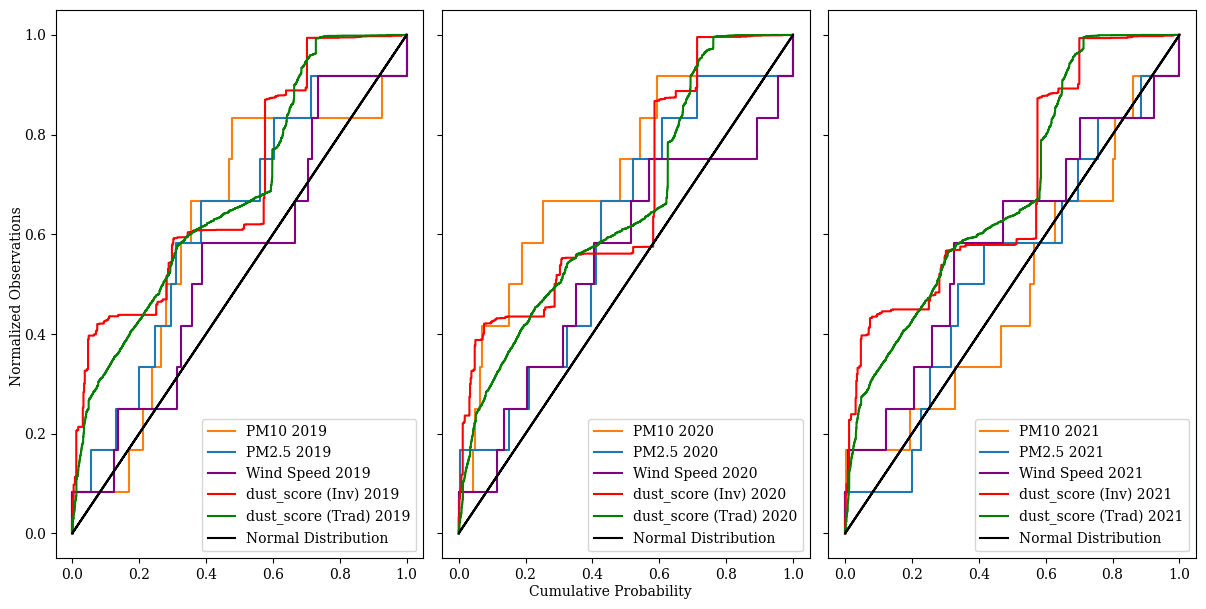

In [17]:
#ECDFs per month
'''TO DO'''
#the dust_score data is hourly though???
#data seems to lose some of its granularity, i.e. ecdf starts to resemble a normal distribution
#which may imply that the data is almost random
fig,ax=plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(12,6))

plot_dict={0:'r',1:'g',2:'b'}
for i in [0,1,2]:
    wind_monthly_means=[]
    for month in range(1,13):
        wind_monthly_means.append(wind_years[i][wind_years[i].index.month==month].mean())

    dust_score_inv=normalize(ellipse_inv_hourly[i])
    dust_score_trad=normalize(ellipse_trad_hourly[i])
    tceq_cams49_pm10_norm = normalize(tceq_pm10_monthly_all[i])
    tceq_cams49_pm25_norm = normalize(tceq_pm25_monthly_all[i])
    wind_norm=normalize(wind_monthly_means)
    
    ecdf1 = ECDF(tceq_cams49_pm10_norm)
    ecdf2 = ECDF(tceq_cams49_pm25_norm)
    ecdf3= ECDF(wind_norm)
    ecdf4=ECDF(dust_score_inv)
    ecdf5=ECDF(dust_score_trad)
    
    ax[i].step(ecdf1.x, ecdf1.y, where='post',label=f'PM10 {i+2019}',color='tab:orange')
    ax[i].step(ecdf2.x, ecdf2.y, where='post', label=f'PM2.5 {i+2019}',color='tab:blue')
    ax[i].step(ecdf3.x, ecdf3.y, where='post', label=f'Wind Speed {i+2019}', color='purple')
    ax[i].step(ecdf4.x, ecdf4.y, where='post', label=f'dust_score (Inv) {i+2019}', color='red')
    ax[i].step(ecdf5.x, ecdf5.y, where='post', label=f'dust_score (Trad) {i+2019}', color='green')

    print("Stats for months in Year ",i+2019)
    print("ED PM10 - PM2.5 ", stats.energy_distance(tceq_cams49_pm10_norm,tceq_cams49_pm25_norm))
    print("ED PM10 - Wind Spd ", stats.energy_distance(tceq_cams49_pm10_norm,wind_norm))
    print("ED PM25 - Wind Spd ", stats.energy_distance(tceq_cams49_pm25_norm,wind_norm))

    x=normalize(np.linspace(0,100,1000))
    ecdf_normdist = ECDF(x)
    ax[i].step(ecdf_normdist.x, ecdf_normdist.y, where='post', label='Normal Distribution', color='black')
    ax[i].legend(loc='lower right')
fig.text(0.5, 0, 'Cumulative Probability', ha='center')
fig.text(0, 0.5, 'Normalized Observations', va='center', rotation='vertical')
fig.tight_layout(pad=1)

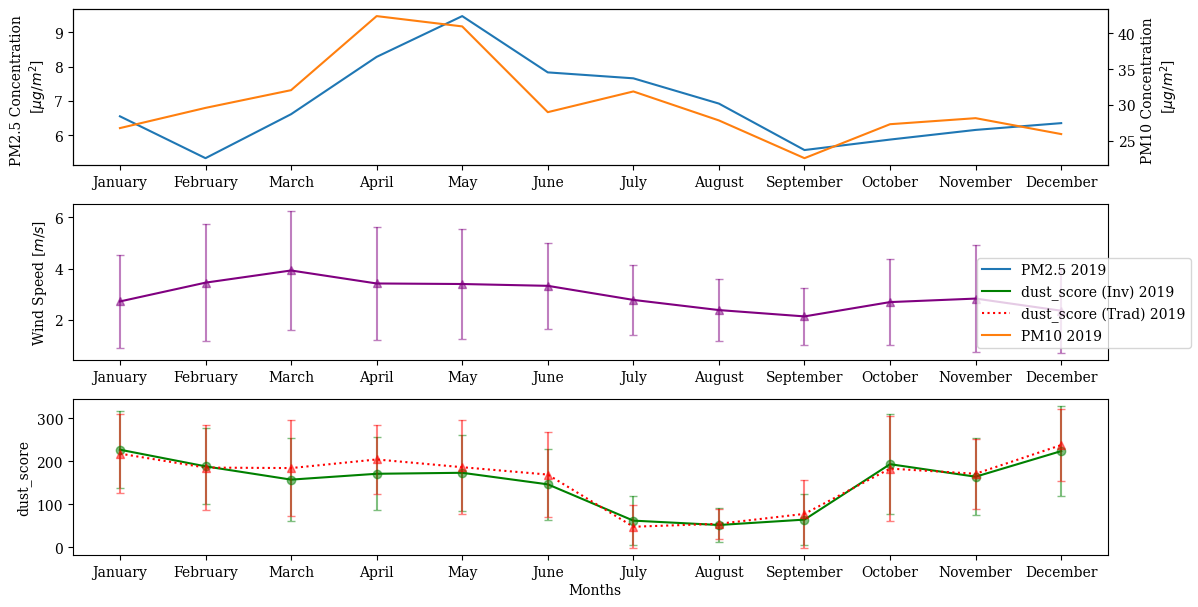

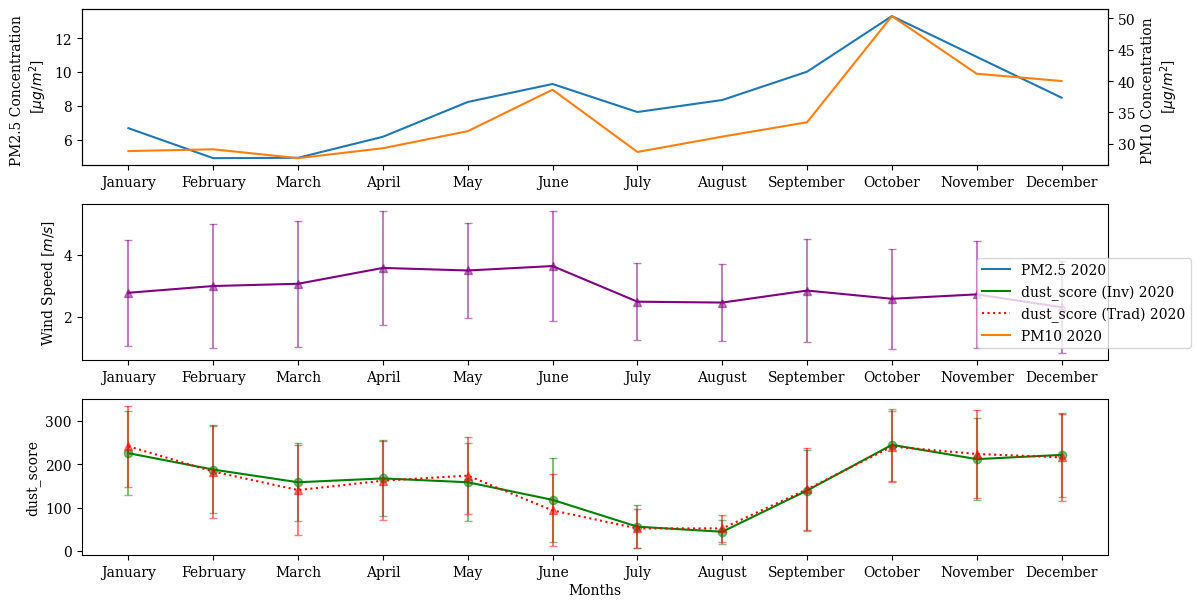

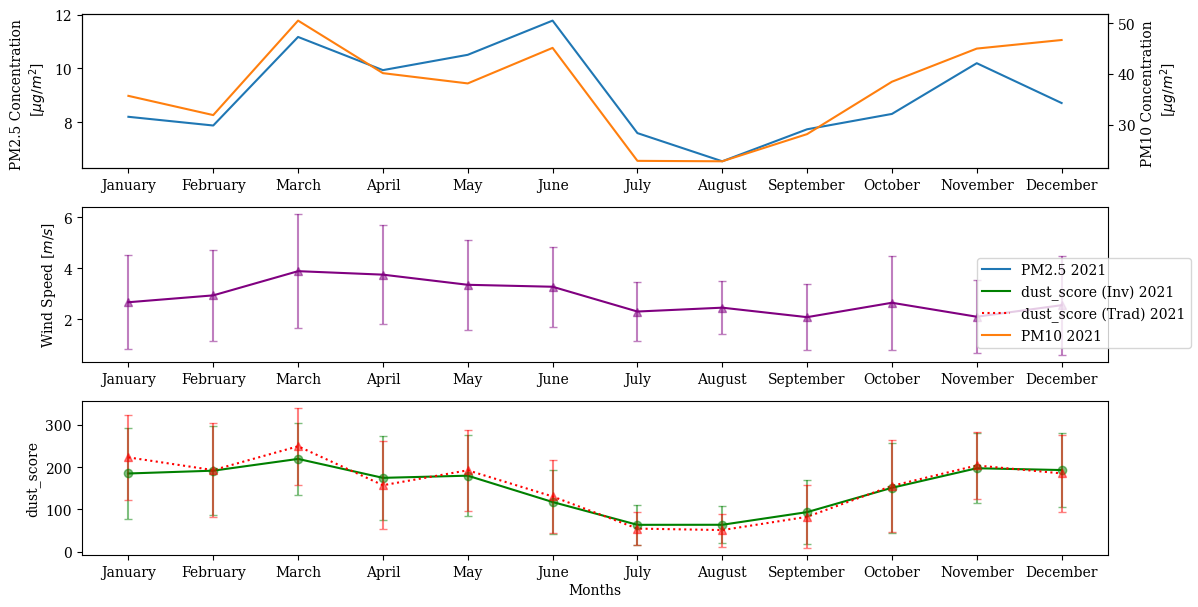

In [18]:
#MONTHS
for year in [2019,2020,2021]:
    fig,ax=plt.subplots(3,1,figsize=(12,6))
    fig.set_tight_layout(True)
    ax[0].set_ylabel('PM2.5 Concentration \n [$μg/m^2$]')
    ax2=ax[0].twinx()
    ax2.set_ylabel('PM10 Concentration \n [$μg/m^2$]')
    ax[1].set_ylabel("Wind Speed [$m/s$]")
    ax[2].set_ylabel("dust_score")
    fig.text(0.5, 0, 'Months', ha='center')
    ax[0].set_xticks(np.arange(12),calendar.month_name[1:])
    ax[1].set_xticks(np.arange(12),calendar.month_name[1:])
    ax[2].set_xticks(np.arange(12),calendar.month_name[1:])
    dust_score_trad_monthly=dust_score_trad_daily_mean_all_years[year-2019].resample('1ME').mean()
    dust_score_trad_monthly_std=dust_score_trad_daily_mean_all_years[year-2019].resample('1ME').std()
    dust_score_inv_monthly=dust_score_inv_daily_mean_all_years[year-2019].resample('1ME').mean()
    dust_score_inv_monthly_std=dust_score_inv_daily_mean_all_years[year-2019].resample('1ME').std()
    pm10_monthly=tceq_pm10_monthly_all[year-2019]
    pm25_monthly=tceq_pm25_monthly_all[year-2019]
    wind_monthly=wind_years[year-2019].resample('1ME').mean()
    wind_monthly_std=wind_years[year-2019].resample('1ME').std()

    ax2.plot(pm10_monthly, label=f"PM10 {year}", color='tab:orange')
    #ax2.errorbar(list(range(pm10_monthly.size)),pm10_monthly,pm10_monthly_std, linestyle='None', marker='^',color='tab:orange', alpha=0.5, capsize=3)
    
    ax[0].plot(pm25_monthly, label=f"PM2.5 {year}", color='tab:blue')
    #ax[0].errorbar(list(range(pm25_monthly.size)),pm25_monthly,pm25_monthly_std, linestyle='None', marker='o',color='tab:blue', alpha=0.5, capsize=3)
    ax[1].plot(wind_monthly.values, color='purple')
    ax[1].errorbar(list(range(wind_monthly.size)),wind_monthly.values,wind_monthly_std.values, linestyle='None', marker='^',color='purple', alpha=0.5, capsize=3)

    ax[2].plot(dust_score_inv_monthly.values.flatten(), label=f"dust_score (Inv) {year}",  color='green')
    ax[2].errorbar(list(range(dust_score_inv_monthly.size)),dust_score_inv_monthly.values.flatten(),dust_score_inv_monthly_std.values.flatten(), linestyle='None', marker='o',color='green', alpha=0.5, capsize=3)   

    ax[2].plot(dust_score_trad_monthly.values, label=f"dust_score (Trad) {year}",  color='red',linestyle='dotted')
    ax[2].errorbar(list(range(dust_score_trad_monthly.size)),dust_score_trad_monthly.values.flatten(),dust_score_trad_monthly_std.values.flatten(), linestyle='None', marker='^',color='red', alpha=0.5, capsize=3)   
    fig.legend(loc='center right')
    
    

C:\Users\lehri\AppData\Local\Temp\ipykernel_30240\3821446233.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dust_score_inv_season_year=np.array([dust_score_inv_spring[0],dust_score_inv_summer[0],dust_score_inv_fall[0],dust_score_inv_winter_mean])
C:\Users\lehri\AppData\Local\Temp\ipykernel_30240\3821446233.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dust_score_inv_season_year_std=np.array([dust_score_inv_spring_std[0],dust_score_inv_summer_std[0],dust_score_inv_fall_std[0],dust_score_inv_winter_std])
C:\Users\lehri\AppData\Local\Temp\ipykernel_30240\3821446233.py:75: FutureWarning: Series.__getitem__ t

Year : 2019
dust_score Inv M=[167.36294973  85.74914597 141.00603078 214.06837573], Std=[ 89.35225346  74.63379792 106.31103012 120.70300707]
dust_score Trad M=[191.51321477  89.79571501 142.66903368 221.51648899], Std=[101.30040306  86.54939155 106.52727314 118.83407104]
PM10 M=[38.47238614 29.55372645 25.98787567 27.95673305], Std=[4.57962839 1.70425658 2.46210336 1.45231657]
PM25 M=[8.12297933 7.46921042 5.85979219 5.97323613], Std=[1.17555834 0.39535671 0.24024578 0.77134813]
Wind Speed M=[2.81195652 2.74782609 2.22857143 2.02111111], Std=[1.50053781 1.51595748 1.35271626 1.20706204]


C:\Users\lehri\AppData\Local\Temp\ipykernel_30240\3821446233.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dust_score_inv_season_year=np.array([dust_score_inv_spring[0],dust_score_inv_summer[0],dust_score_inv_fall[0],dust_score_inv_winter_mean])
C:\Users\lehri\AppData\Local\Temp\ipykernel_30240\3821446233.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dust_score_inv_season_year_std=np.array([dust_score_inv_spring_std[0],dust_score_inv_summer_std[0],dust_score_inv_fall_std[0],dust_score_inv_winter_std])
C:\Users\lehri\AppData\Local\Temp\ipykernel_30240\3821446233.py:75: FutureWarning: Series.__getitem__ t

Year : 2020
dust_score Inv M=[161.11173265  72.06690421 198.68711152 199.26385042], Std=[ 88.22420273  71.5864045   99.40356819 117.10621984]
dust_score Trad M=[159.49575863  65.2471866  202.56937407 211.84485252], Std=[ 93.73859708  59.25743991 101.78768499 116.08395141]
PM10 M=[29.66840342 32.81898213 41.65013674 35.84160906], Std=[1.77747159 4.2226059  6.91904995 3.3267899 ]
PM25 M=[ 6.43743425  8.41921289 11.40437771  8.1860538 ], Std=[1.3613529  0.67933865 1.390588   0.24519628]
Wind Speed M=[2.77065217 2.94130435 2.4        2.06555556], Std=[1.29729542 1.39993345 1.26982063 1.16734848]


C:\Users\lehri\AppData\Local\Temp\ipykernel_30240\3821446233.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dust_score_inv_season_year=np.array([dust_score_inv_spring[0],dust_score_inv_summer[0],dust_score_inv_fall[0],dust_score_inv_winter_mean])
C:\Users\lehri\AppData\Local\Temp\ipykernel_30240\3821446233.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dust_score_inv_season_year_std=np.array([dust_score_inv_spring_std[0],dust_score_inv_summer_std[0],dust_score_inv_fall_std[0],dust_score_inv_winter_std])
C:\Users\lehri\AppData\Local\Temp\ipykernel_30240\3821446233.py:75: FutureWarning: Series.__getitem__ t

Year : 2021
dust_score Inv M=[191.64249442  81.18770678 147.39886891 199.26385042], Std=[ 94.39234724  61.65105757  97.91090603 117.10621984]
dust_score Trad M=[200.24361883  78.79135602 146.48553224 211.84485252], Std=[103.39702288  69.34000114 100.90862119 116.08395141]
PM10 M=[42.89993945 30.23968569 37.17277039 35.84160906], Std=[ 5.41819455 10.50907557  6.93371382  3.3267899 ]
PM25 M=[10.5345808   8.63963071  8.74587494  8.1860538 ], Std=[0.50349891 2.25662023 1.04851972 0.24519628]
Wind Speed M=[2.89347826 2.45108696 1.87472527 2.06555556], Std=[1.33957549 1.26330237 0.98325914 1.16734848]


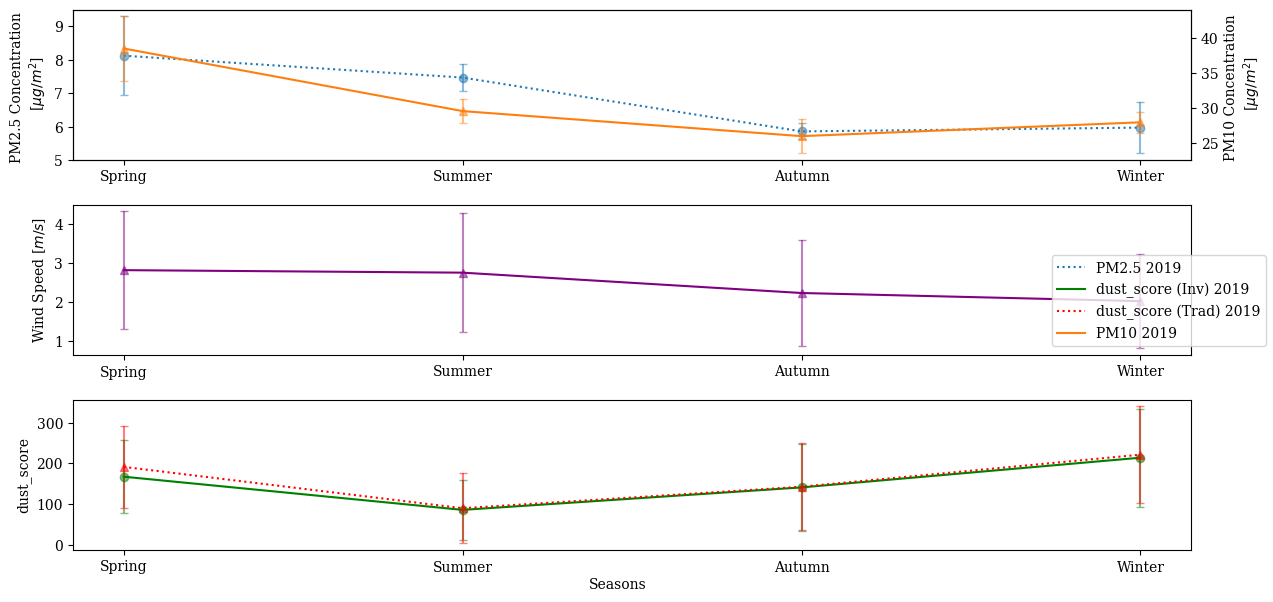

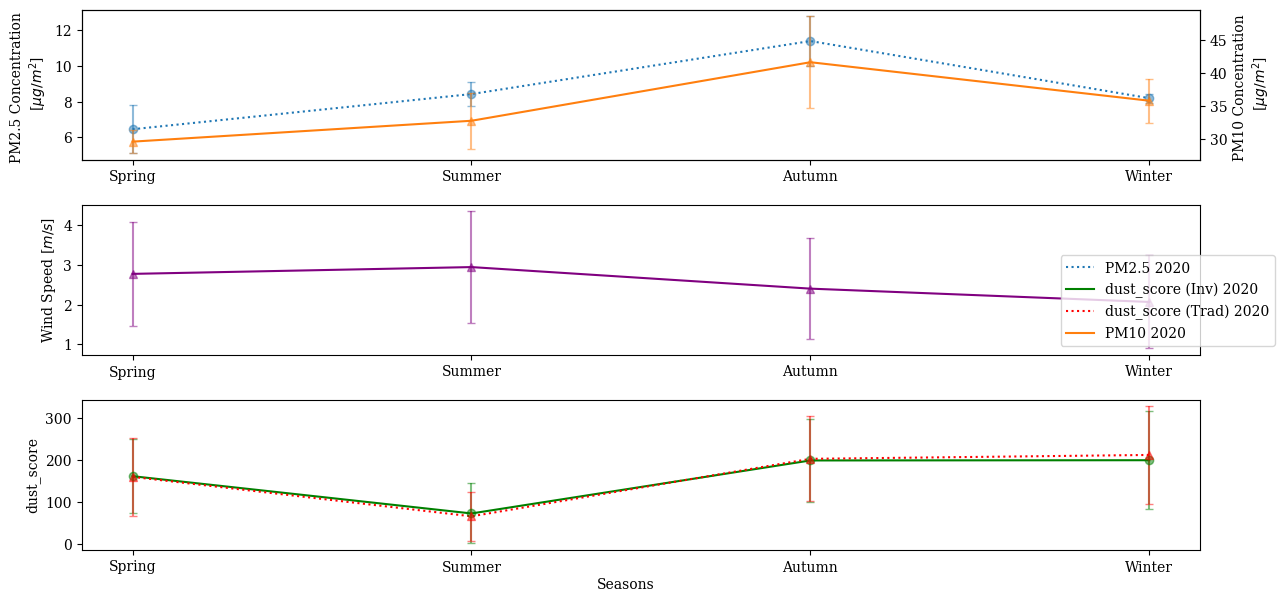

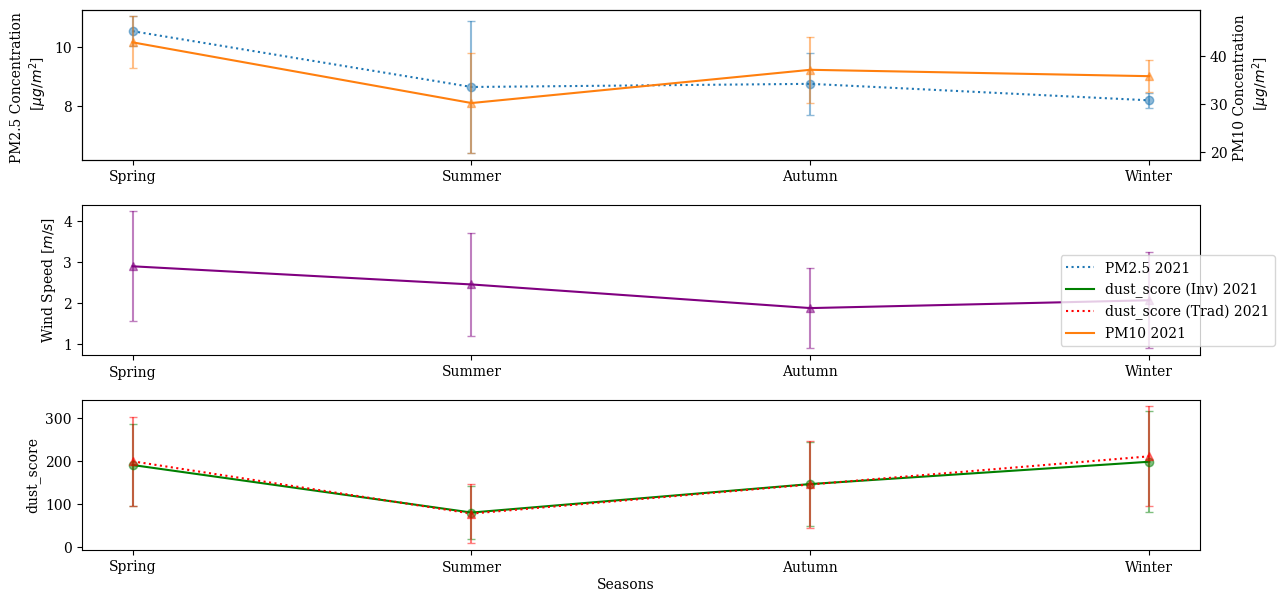

In [19]:
#SEASONS
for year in [2019,2020,2021]:
    fig,ax=plt.subplots(3,1,figsize=(12,6))
    fig.tight_layout()
    ax[0].set_ylabel('PM2.5 Concentration \n [$μg/m^2$]')
    ax2=ax[0].twinx()
    ax2.set_ylabel('PM10 Concentration \n [$μg/m^2$]')
    ax[1].set_ylabel("Wind Speed [$m/s$]")
    ax[2].set_ylabel("dust_score")
    fig.text(0.5, 0, 'Seasons', ha='center')
    ax[0].set_xticks(np.arange(4),["Spring","Summer","Autumn","Winter"])
    ax[1].set_xticks(np.arange(4),["Spring","Summer","Autumn","Winter"] )
    ax[2].set_xticks(np.arange(4),["Spring","Summer","Autumn","Winter"])
    dust_score_inv_spring=dust_score_inv_daily_mean_all_years[year-2019].loc[pd.date_range(start=f'{year}-03-01',end=f'{year}-05-31')].mean()
    dust_score_inv_spring_std=dust_score_inv_daily_mean_all_years[year-2019].loc[pd.date_range(start=f'{year}-03-01',end=f'{year}-05-31')].std()
    dust_score_inv_summer=dust_score_inv_daily_mean_all_years[year-2019].loc[pd.date_range(start=f'{year}-06-01',end=f'{year}-08-31')].mean()
    dust_score_inv_summer_std=dust_score_inv_daily_mean_all_years[year-2019].loc[pd.date_range(start=f'{year}-06-01',end=f'{year}-08-31')].std()
    dust_score_inv_fall=dust_score_inv_daily_mean_all_years[year-2019].loc[pd.date_range(start=f'{year}-09-01',end=f'{year}-11-30')].mean()
    dust_score_inv_fall_std=dust_score_inv_daily_mean_all_years[year-2019].loc[pd.date_range(start=f'{year}-09-01',end=f'{year}-11-30')].std()

    dust_score_trad_spring=dust_score_trad_daily_mean_all_years[year-2019].loc[pd.date_range(start=f'{year}-03-01',end=f'{year}-05-31')].mean()
    dust_score_trad_spring_std=dust_score_trad_daily_mean_all_years[year-2019].loc[pd.date_range(start=f'{year}-03-01',end=f'{year}-05-31')].std()
    dust_score_trad_summer=dust_score_trad_daily_mean_all_years[year-2019].loc[pd.date_range(start=f'{year}-06-01',end=f'{year}-08-31')].mean()
    dust_score_trad_summer_std=dust_score_trad_daily_mean_all_years[year-2019].loc[pd.date_range(start=f'{year}-06-01',end=f'{year}-08-31')].std()
    dust_score_trad_fall=dust_score_trad_daily_mean_all_years[year-2019].loc[pd.date_range(start=f'{year}-09-01',end=f'{year}-11-30')].mean()
    dust_score_trad_fall_std=dust_score_trad_daily_mean_all_years[year-2019].loc[pd.date_range(start=f'{year}-09-01',end=f'{year}-11-30')].std()

    wind_spring=wind_years[year-2019][pd.date_range(start=f'{year}-03-01',end=f'{year}-05-31')].mean()
    wind_spring_std=wind_years[year-2019][pd.date_range(start=f'{year}-03-01',end=f'{year}-05-31')].std()
    wind_summer=wind_years[year-2019][pd.date_range(start=f'{year}-06-01',end=f'{year}-08-31')].mean()
    wind_summer_std=wind_years[year-2019][pd.date_range(start=f'{year}-06-01',end=f'{year}-08-31')].std()
    wind_fall=wind_years[year-2019][pd.date_range(start=f'{year}-09-01',end=f'{year}-11-30')].mean()
    wind_fall_std=wind_years[year-2019][pd.date_range(start=f'{year}-09-01',end=f'{year}-11-30')].std()
    
    pm10_spring=tceq_pm10_monthly_all[year-2019][2:5].mean()
    pm10_spring_std=tceq_pm10_monthly_all[year-2019][2:5].std()
    pm10_summer=tceq_pm10_monthly_all[year-2019][5:8].mean()
    pm10_summer_std=tceq_pm10_monthly_all[year-2019][5:8].std()
    pm10_autumn=tceq_pm10_monthly_all[year-2019][8:11].mean()
    pm10_autumn_std=tceq_pm10_monthly_all[year-2019][8:11].std()

    pm25_spring=tceq_pm25_monthly_all[year-2019][2:5].mean()
    pm25_spring_std=tceq_pm25_monthly_all[year-2019][2:5].std()
    pm25_summer=tceq_pm25_monthly_all[year-2019][5:8].mean()
    pm25_summer_std=tceq_pm25_monthly_all[year-2019][5:8].std()
    pm25_autumn=tceq_pm25_monthly_all[year-2019][8:11].mean()
    pm25_autumn_std=tceq_pm25_monthly_all[year-2019][8:11].std()    

    if year!=2021:        
        dust_score_inv_winter=dust_score_inv_daily_mean_all_years[year-2019].loc[pd.date_range(start=f'{year}-12-01',end=f'{year}-12-31')].values.flatten()
        dust_score_inv_winter_mean=np.append(dust_score_inv_winter,dust_score_inv_daily_mean_all_years[year+1-2019].loc[pd.date_range(start=f'{year+1}-01-01',end=f'{year+1}-02-28')].values.flatten())
        dust_score_inv_winter_mean=np.nanmean(dust_score_inv_winter_mean)
        dust_score_inv_winter_std=np.append(dust_score_inv_winter,wind_years[year+1-2019].loc[pd.date_range(start=f'{year+1}-01-01',end=f'{year+1}-02-28')])       
        dust_score_inv_winter_std=np.nanstd(dust_score_inv_winter_std)

        dust_score_trad_winter=dust_score_trad_daily_mean_all_years[year-2019].loc[pd.date_range(start=f'{year}-12-01',end=f'{year}-12-31')].values.flatten()
        dust_score_trad_winter_mean=np.append(dust_score_trad_winter,dust_score_trad_daily_mean_all_years[year+1-2019].loc[pd.date_range(start=f'{year+1}-01-01',end=f'{year+1}-02-28')].values.flatten())
        dust_score_trad_winter_mean=np.nanmean(dust_score_trad_winter_mean)
        dust_score_trad_winter_std=np.append(dust_score_trad_winter,wind_years[year+1-2019].loc[pd.date_range(start=f'{year+1}-01-01',end=f'{year+1}-02-28')])       
        dust_score_trad_winter_std=np.nanstd(dust_score_trad_winter_std)
        
        wind_winter=wind_years[year-2019][pd.date_range(start=f'{year}-12-01',end=f'{year}-12-31')]
        wind_winter_mean=np.append(wind_winter,wind_years[year+1-2019][pd.date_range(start=f'{year+1}-01-01',end=f'{year+1}-02-28')]).mean()
        wind_winter_std=np.append(wind_winter,wind_years[year+1-2019][pd.date_range(start=f'{year+1}-01-01',end=f'{year+1}-02-28')]).std()

        pm10_winter=np.append(tceq_pm10_monthly_all[year-2019][11],tceq_pm10_monthly_all[year+1-2019][0:2].tolist()).mean()
        pm10_winter_std=np.append(tceq_pm10_monthly_all[year-2019][11],tceq_pm10_monthly_all[year+1-2019][0:2].tolist()).std()
        
        pm25_winter=np.append(tceq_pm25_monthly_all[year-2019][11],tceq_pm25_monthly_all[year+1-2019][0:2].tolist()).mean()
        pm25_winter_std=np.append(tceq_pm25_monthly_all[year-2019][11],tceq_pm25_monthly_all[year+1-2019][0:2].tolist()).std()

    dust_score_inv_season_year=np.array([dust_score_inv_spring[0],dust_score_inv_summer[0],dust_score_inv_fall[0],dust_score_inv_winter_mean])
    dust_score_inv_season_year_std=np.array([dust_score_inv_spring_std[0],dust_score_inv_summer_std[0],dust_score_inv_fall_std[0],dust_score_inv_winter_std])

    dust_score_trad_season_year=np.array([dust_score_trad_spring[0],dust_score_trad_summer[0],dust_score_trad_fall[0],dust_score_trad_winter_mean])
    dust_score_trad_season_year_std=np.array([dust_score_trad_spring_std[0],dust_score_trad_summer_std[0],dust_score_trad_fall_std[0],dust_score_trad_winter_std])

    wind_season_year=np.array([wind_spring,wind_summer,wind_fall,wind_winter_mean])
    wind_season_year_std=np.array([wind_spring_std,wind_summer_std,wind_fall_std,wind_winter_std])

    pm10_season_year=np.array([pm10_spring,pm10_summer,pm10_autumn,pm10_winter])
    pm10_season_year_std=np.array([pm10_spring_std,pm10_summer_std,pm10_autumn_std,pm10_winter_std])
    pm25_season_year=np.array([pm25_spring,pm25_summer,pm25_autumn,pm25_winter])
    pm25_season_year_std=np.array([pm25_spring_std,pm25_summer_std,pm25_autumn_std,pm25_winter_std])
    print("Year :",year)
    print(f"dust_score Inv M={dust_score_inv_season_year}, Std={dust_score_inv_season_year_std}")
    print(f"dust_score Trad M={dust_score_trad_season_year}, Std={dust_score_trad_season_year_std}")
    print(f"PM10 M={pm10_season_year}, Std={pm10_season_year_std}")
    print(f"PM25 M={pm25_season_year}, Std={pm25_season_year_std}")
    print(f"Wind Speed M={wind_season_year}, Std={wind_season_year_std}")

    
    ax2.plot(pm10_season_year, label=f"PM10 {year}", color='tab:orange')
    ax2.errorbar(list(range(pm10_season_year.size)),pm10_season_year,pm10_season_year_std, linestyle='None', marker='^',color='tab:orange', alpha=0.5, capsize=3)

    ax[0].plot(pm25_season_year, label=f"PM2.5 {year}", color='tab:blue', linestyle='dotted')
    ax[0].errorbar(list(range(pm25_season_year.size)),pm25_season_year,pm25_season_year_std, linestyle='None', marker='o',color='tab:blue', alpha=0.5, capsize=3)

    ax[1].plot(wind_season_year, color='purple')
    ax[1].errorbar(list(range(wind_season_year.size)),wind_season_year,wind_season_year_std, linestyle='None', marker='^',color='purple', alpha=0.5, capsize=3)

    ax[2].plot(dust_score_inv_season_year, label=f"dust_score (Inv) {year}",  color='green')
    ax[2].errorbar(list(range(dust_score_inv_season_year.size)),dust_score_inv_season_year,dust_score_inv_season_year_std, linestyle='None', marker='o',color='green', alpha=0.5, capsize=3)   

    ax[2].plot(dust_score_trad_season_year, label=f"dust_score (Trad) {year}",  color='red',linestyle='dotted')
    ax[2].errorbar(list(range(dust_score_trad_season_year.size)),dust_score_trad_season_year,dust_score_trad_season_year_std, linestyle='None', marker='^',color='red', alpha=0.5, capsize=3)   

    fig.legend(loc="center right")

<h1>ECDFS: Dust_score, PM10, PM2.5, Wind Speed</h1>

In [20]:
def get_matched_values(f_x,f_y):
    matched_x = np.array([])
    for xi, yi in zip(f_x, f_y):
        # Check if this (x, y) pair exists in the second ECDF
        if xi in f_x:
            index = np.where(f_x == xi)[0][0]  # Find corresponding index in x2
            
            if f_y[index].round(decimals=1) == yi.round(decimals=1):
                matched_x=np.append(matched_x,xi)
    
    print("Matched x-values:", matched_x[matched_x>0].size)
    return matched_x[matched_x>0]

def get_intersect_values(f_x1, f_y1, f_x2, f_y2):
    all_x = np.sort(np.unique(np.concatenate([f_x1, f_x2])))
    # Evaluate both ECDFs at all_x points
    y1_interp = np.interp(all_x, f_x1, f_y1)
    y2_interp = np.interp(all_x, f_x2, f_y2)
    # Find x-values where ECDFs intersect (y1 == y2)
    intersection_indices = np.where(np.isclose(y1_interp, y2_interp))[0]
    intersection_points = all_x[intersection_indices]
    
    print("Intersection points:", intersection_points[1:].size)
    return intersection_points[1:]

from sklearn.cluster import DBSCAN
#do cluster scan INSTEAD of shorten array method
def get_dbscan_cluster(data_array):
    
    # Reshape data for DBSCAN
    data = data_array.reshape(-1, 1)
    # DBSCAN clustering
    db = DBSCAN(eps=6, min_samples=2).fit(data)
    # Get cluster labels
    labels = db.labels_
    # Identify unique clusters (excluding noise, labeled as -1)
    clusters = np.unique(labels[labels != -1])
    # Find representative values (mean of each cluster)
    representative_values = []
    for cluster in clusters:
        cluster_points = data[labels == cluster]
        representative_values.append(cluster_points.mean())
    return representative_values


Matched x-values: 9886
Matched x-values: 7960
[4.11690046760187, 19.487940630797773, 37.18099547511312, 52.144827586206894, 70.06382978723404, 144.15389408099688, 180.08219178082192, 198.0, 217.33333333333334, 261.8181818181818, 293.61892797319933, 325.9019607843137, 357.78594594594597, 391.0, 406.0, 422.0, 436.9714285714286, 454.0, 486.0, 502.0, 510.2]


'\nprint("Dust_score (Trad)")\nfor elem in array_high_jumps:\n    print(f\'P(x<{elem}): \', ecdf_dust_trad(elem+8).round(decimals=3))\nprint("Dust_score (Inv)")\nfor elem in array_high_jumps:\n    print(f\'P(x<{elem}): \', ecdf_dust_inv(elem+8).round(decimals=3))\n'

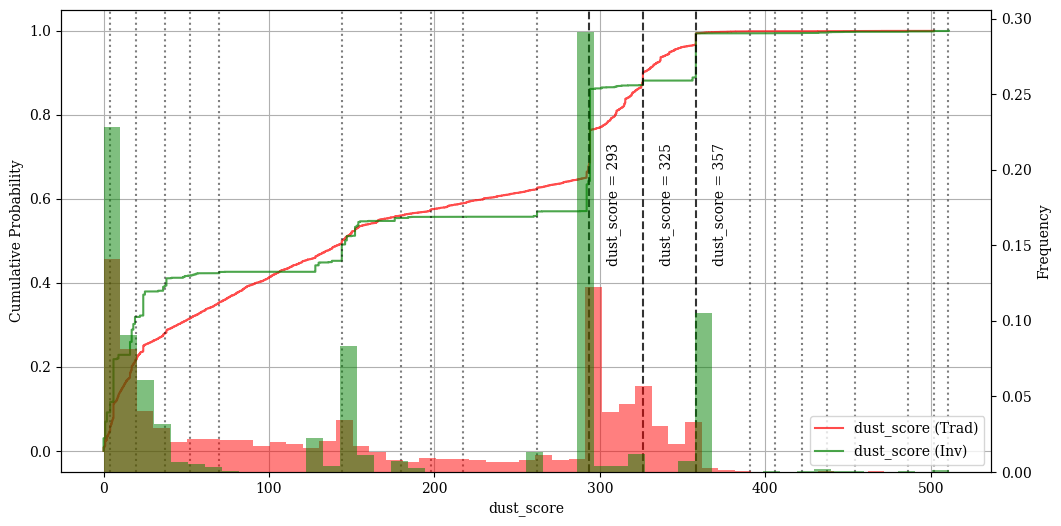

In [21]:
#ECDFs OF NOT NORMALIZED TRAD AND INV WIND DUST_SCORE
fig,ax=plt.subplots(figsize=(12,6))
#normalize all data

ax2=ax.twinx()

dust_trad=ellipse_trad_hourly_totals
dust_inv=ellipse_inv_hourly_totals
#dust_trad_norm_300=ellipse_trad_hourly_totals[ellipse_trad_hourly_totals>380]
#dust_inv_norm_300=ellipse_inv_hourly_totals[ellipse_inv_hourly_totals>380]
#dust_trad_norm_100=ellipse_trad_hourly_totals[ellipse_trad_hourly_totals>300]
#dust_inv_norm_100=ellipse_inv_hourly_totals[ellipse_inv_hourly_totals>300]

ecdf_dust_trad=ECDF(dust_trad)
ecdf_dust_inv=ECDF(dust_inv)


ax.step(ecdf_dust_trad.x, ecdf_dust_trad.y, where='post', label='dust_score (Trad)',color='red',alpha=0.7)
ax.step(ecdf_dust_inv.x, ecdf_dust_inv.y, where='post', label='dust_score (Inv)',color='green',alpha=0.7)

dust_trad_values=ecdf_dust_trad.x[1:]
dust_inv_values=ecdf_dust_inv.x[1:]
ax2.hist(dust_trad_values,bins=50,weights=np.zeros_like(dust_trad_values) + 1. / dust_trad_values.size, alpha=0.5, color='red')
ax2.hist(dust_inv_values,bins=50,weights=np.zeros_like(dust_inv_values) + 1. / dust_inv_values.size, alpha=0.5, color='green')

major_jump_points_trad_unique=get_matched_values(ecdf_dust_trad.x,ecdf_dust_trad.y)
major_jump_points_inv_unique=get_matched_values(ecdf_dust_inv.x,ecdf_dust_inv.y)
#intersect_jumps=np.intersect1d(major_jump_points_trad_unique,major_jump_points_inv_unique)
#intersect_jumps_short=shorten_array(intersect_jumps)
intersect_jumps_short=get_dbscan_cluster(major_jump_points_inv_unique)
print(intersect_jumps_short)
array_high_jumps=[]

for line in intersect_jumps_short:
    if line>280 and line<390:
        ax.axvline(line, color='black', linestyle='dashed',alpha=0.8)
        ax.text(line+10, 0.45, "dust_score = %d" % line, rotation=90)
        array_high_jumps.append(line)
    else:
        ax.axvline(line, color='black', linestyle='dotted',alpha=0.5)
        
ax.set_ylabel("Cumulative Probability")
ax.set_xlabel("dust_score")
ax2.set_ylabel("Frequency")
ax.legend(loc='lower right')
ax.grid()
'''
print("Dust_score (Trad)")
for elem in array_high_jumps:
    print(f'P(x<{elem}): ', ecdf_dust_trad(elem+8).round(decimals=3))
print("Dust_score (Inv)")
for elem in array_high_jumps:
    print(f'P(x<{elem}): ', ecdf_dust_inv(elem+8).round(decimals=3))
'''

In [22]:
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks
kde = gaussian_kde(dust_trad_values)
x_vals = np.linspace(min(dust_trad_values), max(dust_trad_values), 1000)
density = kde(x_vals)
peaks, _ = find_peaks(density)
modes = x_vals[peaks]
print("Modes dust_score (Trad):", modes)

Modes dust_score (Trad): [ 14.07007007 135.67567568 307.02902903 450.74474474]


In [23]:
kde = gaussian_kde(dust_inv_values)
x_vals = np.linspace(min(dust_inv_values), max(dust_inv_values), 1000)
density = kde(x_vals)
peaks, _ = find_peaks(density)

modes = x_vals[peaks]
print("Modes dust_score (Inv):", modes)

Modes dust_score (Inv): [ 11.25325325 145.78078078 294.11911912 353.45445445 493.0970971 ]


In [24]:
def get_iqr(array):
    q75, q25 = np.percentile(array, [75 ,25])
    return q25, q75

In [25]:
print("dust_score (Inv): ",dust_inv_values.mean(),st.median(dust_inv_values),dust_inv_values.std(),get_iqr(dust_inv_values))
print("dust_score (Trad): ",dust_trad_values.mean(),st.median(dust_trad_values),dust_trad_values.std(),get_iqr(dust_trad_values))

pm25_percentiles=get_percentiles(tceq_pm25_all)
pm10_percentiles=get_percentiles(tceq_pm10_all)
dust_inv_percentiles=get_percentiles(ellipse_inv_hourly_totals)
dust_trad_percentiles=get_percentiles(ellipse_trad_hourly_totals)
wind_percentiles=get_percentiles(wind_years_valuesonly)
print(get_percentiles(dust_inv_values),get_percentiles(dust_trad_values))
print(pm25_percentiles,pm10_percentiles,dust_inv_percentiles,dust_trad_percentiles,wind_percentiles)

dust_score (Inv):  163.32626523827116 146.0 141.31492762901877 (16.0, 294.0)
dust_score (Trad):  164.8180525446623 144.0 129.88446824376246 (24.0, 294.0)
[4.0, 146.0, 358.0] [6.0, 144.0, 326.0]
[2.3, 6.4, 15.2] [11.6, 24.0, 60.4] [4.0, 146.0, 358.0] [6.0, 144.0, 326.0] [1.0, 2.5, 5.4]


[293.61892797319933, 325.9019607843137, 357.78594594594597]
294
Percentile:  76.4
PM2.5: 10.4, PM10: 38.5
Dust_score Inv: 294.0, Dust_score Trad: 294.1524
326
Percentile:  90.10000000000001
PM2.5: 15.2, PM10: 60.6
Dust_score Inv: 358.0, Dust_score Trad: 326.14920000000006
358
Percentile:  99.4
PM2.5: 39.52180000000044, PM10: 237.9320000000007
Dust_score Inv: 358.0, Dust_score Trad: 358.2298181818183


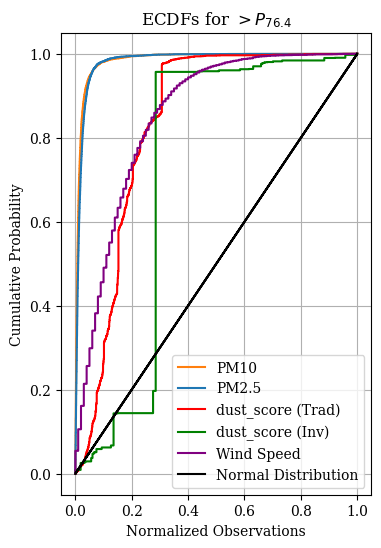

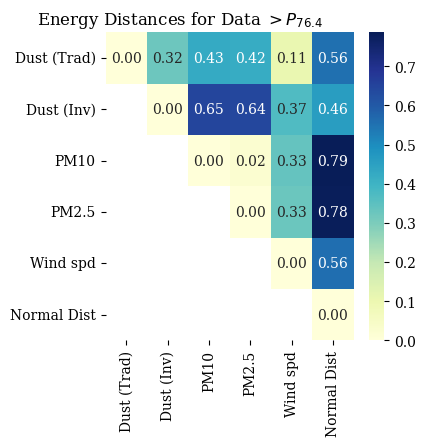

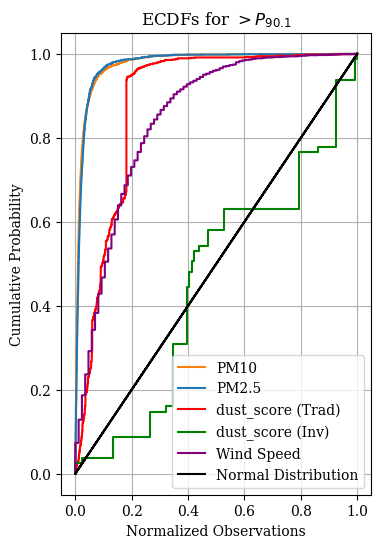

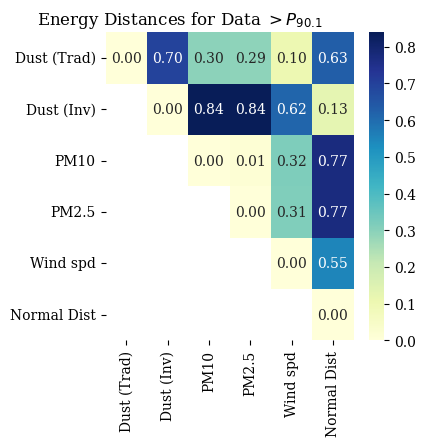

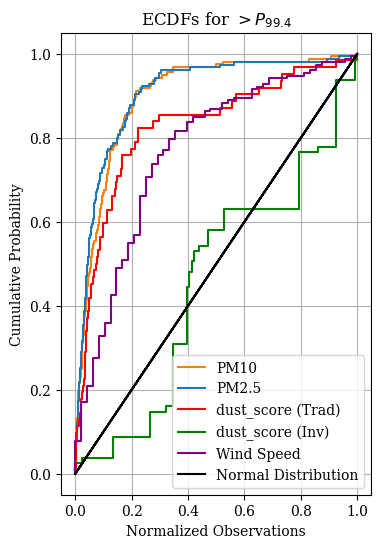

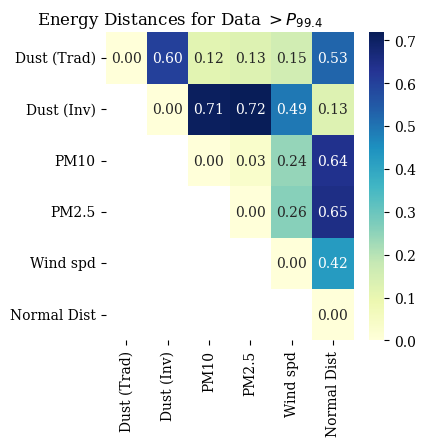

In [26]:
#ECDFs TRADITIONAL WIND DUSTSCORE SAMPLING METHOD!!
#FOR DUST_SCORE AND PM THRESHOLD VALUES!
import math
print(array_high_jumps)
for elem in array_high_jumps:
    print(math.ceil(elem))
    fig,ax=plt.subplots(figsize=(4,6))
    #use ecdf1 for now
    percentile_ecdf=ecdf_dust_trad(math.ceil(elem)).round(decimals=3)*100
    print("Percentile: ",percentile_ecdf)
    pm25_threshold=np.percentile(tceq_pm25_all,percentile_ecdf)
    pm10_threshold=np.percentile(tceq_pm10_all,percentile_ecdf)
    dust_inv_threshold=np.percentile(ellipse_inv_hourly_totals,percentile_ecdf)
    dust_trad_threshold=np.percentile(ellipse_trad_hourly_totals,percentile_ecdf)
    wind_threshold=np.percentile(wind_years_valuesonly,percentile_ecdf)
    print(f"PM2.5: {pm25_threshold}, PM10: {pm10_threshold}")
    print(f"Dust_score Inv: {dust_inv_threshold}, Dust_score Trad: {dust_trad_threshold}")

    #Normalize
    dust_trad_norm=normalize(ellipse_trad_hourly_totals[ellipse_trad_hourly_totals>dust_trad_threshold])
    dust_inv_norm=normalize(ellipse_inv_hourly_totals[ellipse_inv_hourly_totals>dust_inv_threshold])
    tceq_cams49_pm10_norm = normalize(tceq_pm10_all[tceq_pm10_all>pm10_threshold])
    tceq_cams49_pm25_norm = normalize(tceq_pm25_all[tceq_pm25_all>pm25_threshold])
    wind_spd_norm=normalize(wind_years_valuesonly[wind_years_valuesonly>wind_threshold])


    ecdf1 = ECDF(tceq_cams49_pm10_norm)
    ecdf2 = ECDF(tceq_cams49_pm25_norm)
    ecdf3=ECDF(dust_trad_norm)
    ecdf4=ECDF(dust_inv_norm)
    ecdf5=ECDF(wind_spd_norm)
    ax.set_title(f"ECDFs for $>P_{{{percentile_ecdf.round(decimals=2)}}}$")
    ax.step(ecdf1.x, ecdf1.y, where='post',label='PM10',color='tab:orange')
    ax.step(ecdf2.x, ecdf2.y, where='post', label='PM2.5',color='tab:blue')
    ax.step(ecdf3.x, ecdf3.y, where='post', label='dust_score (Trad)',color='red')
    ax.step(ecdf4.x, ecdf4.y, where='post', label='dust_score (Inv)',color='green')
    ax.step(ecdf5.x, ecdf5.y, where='post', label='Wind Speed', color='purple')
    
    
    x=normalize(np.linspace(0,100,1000))
    ecdf_normdist = ECDF(x)
    ax.step(ecdf_normdist.x, ecdf_normdist.y, where='post', label='Normal Distribution', color='black')
    
    ax.set_ylabel("Cumulative Probability")
    ax.set_xlabel("Normalized Observations")
    ax.legend(loc='lower right')
    ax.grid()
    fig,ax=plt.subplots(figsize=(4,4))
    elements=[dust_trad_norm,dust_inv_norm,tceq_cams49_pm10_norm,tceq_cams49_pm25_norm,wind_spd_norm,x]
    df_corr_table=get_ed_table(elements)
    corr_mask_matrix = np.tril(df_corr_table)
    ax=sns.heatmap(df_corr_table, annot=True, mask=corr_mask_matrix, fmt='.2f',cmap="YlGnBu")
    ax.set_title(f'Energy Distances for Data $>P_{{{percentile_ecdf.round(decimals=2)}}}$',x=0.3)
    

[293.61892797319933, 325.9019607843137, 357.78594594594597]
294
76.4
10.4 38.5
326
90.10000000000001
15.2 60.6
358
99.4
39.52180000000044 237.9320000000007


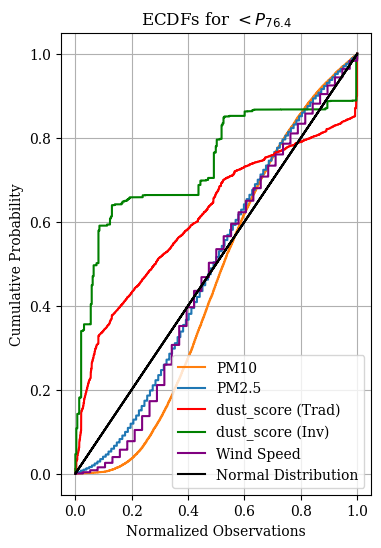

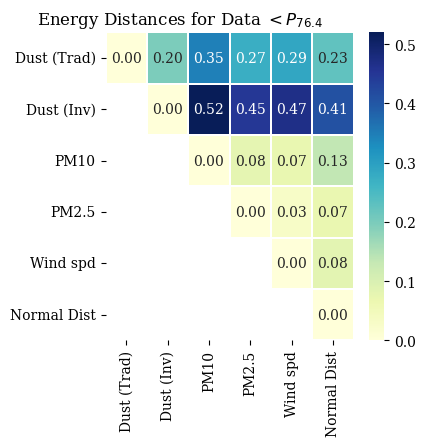

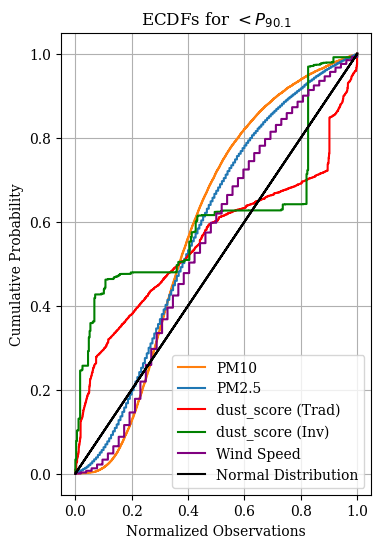

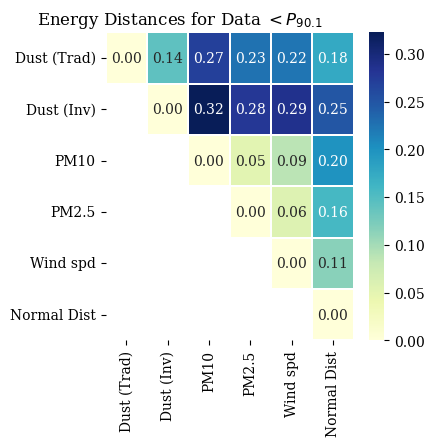

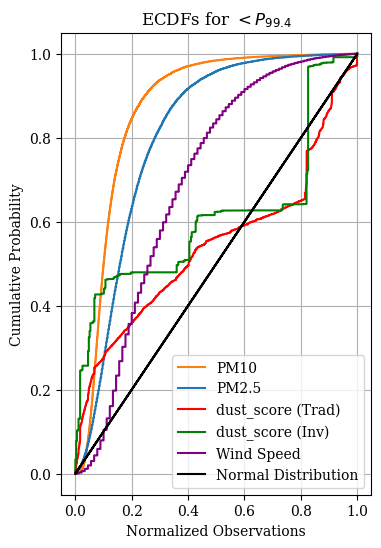

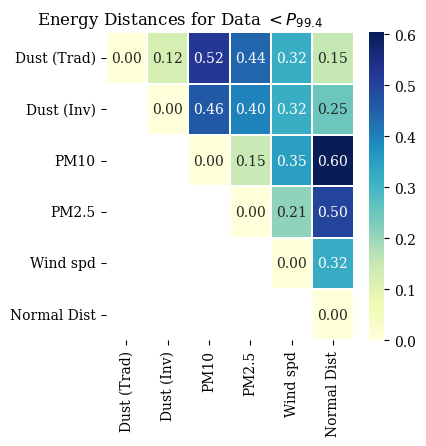

In [27]:
#ECDFs TRADITIONAL WIND DUSTSCORE SAMPLING METHOD!!
#FOR DUST_SCORE AND PM THRESHOLD VALUES!
import math
print(array_high_jumps)
for elem in array_high_jumps:
    print(math.ceil(elem))
    fig,ax=plt.subplots(figsize=(4,6))
    #use ecdf1 for now
    percentile_ecdf=ecdf_dust_trad(math.ceil(elem)).round(decimals=3)*100
    print(percentile_ecdf)
    pm25_threshold=np.percentile(tceq_pm25_all,percentile_ecdf)
    pm10_threshold=np.percentile(tceq_pm10_all,percentile_ecdf)
    print(pm25_threshold,pm10_threshold)
    dust_inv_threshold=np.percentile(ellipse_inv_hourly_totals,percentile_ecdf)
    dust_trad_threshold=np.percentile(ellipse_trad_hourly_totals,percentile_ecdf)
    wind_threshold=np.percentile(wind_years_valuesonly,percentile_ecdf)
    #Normalize
    dust_trad_norm=normalize(ellipse_trad_hourly_totals[ellipse_trad_hourly_totals<dust_trad_threshold])
    dust_inv_norm=normalize(ellipse_inv_hourly_totals[ellipse_inv_hourly_totals<dust_inv_threshold])
    tceq_cams49_pm10_norm = normalize(tceq_pm10_all[tceq_pm10_all<pm10_threshold])
    tceq_cams49_pm25_norm = normalize(tceq_pm25_all[tceq_pm25_all<pm25_threshold])
    wind_spd_norm=normalize(wind_years_valuesonly[wind_years_valuesonly<wind_threshold])

    ecdf1 = ECDF(tceq_cams49_pm10_norm)
    ecdf2 = ECDF(tceq_cams49_pm25_norm)
    ecdf3=ECDF(dust_trad_norm)
    ecdf4=ECDF(dust_inv_norm)
    ecdf5=ECDF(wind_spd_norm)
    ax.set_title(f"ECDFs for $<P_{{{percentile_ecdf.round(decimals=2)}}}$")
    ax.step(ecdf1.x, ecdf1.y, where='post',label='PM10',color='tab:orange')
    ax.step(ecdf2.x, ecdf2.y, where='post', label='PM2.5',color='tab:blue')
    ax.step(ecdf3.x, ecdf3.y, where='post', label='dust_score (Trad)', color='red')
    ax.step(ecdf4.x, ecdf4.y, where='post', label='dust_score (Inv)', color='green')
    ax.step(ecdf5.x, ecdf5.y, where='post', label='Wind Speed',color='purple')
    
    
    x=normalize(np.linspace(0,100,1000))
    ecdf_normdist = ECDF(x)
    ax.step(ecdf_normdist.x, ecdf_normdist.y, where='post', label='Normal Distribution', color='black')
    
    ax.set_ylabel("Cumulative Probability")
    ax.set_xlabel("Normalized Observations")
    ax.legend(loc='lower right')
    ax.grid()
    
    fig,ax=plt.subplots(figsize=(4,4))
    elements=[dust_trad_norm,dust_inv_norm,tceq_cams49_pm10_norm,tceq_cams49_pm25_norm,wind_spd_norm,x]
    df_corr_table=get_ed_table(elements)
    corr_mask_matrix = np.tril(df_corr_table)
    ax=sns.heatmap(df_corr_table, annot=True, mask=corr_mask_matrix, fmt='.2f',cmap="YlGnBu",linewidths=.3)
    ax.set_title(f'Energy Distances for Data $<P_{{{percentile_ecdf.round(decimals=2)}}}$', x=0.3)
    

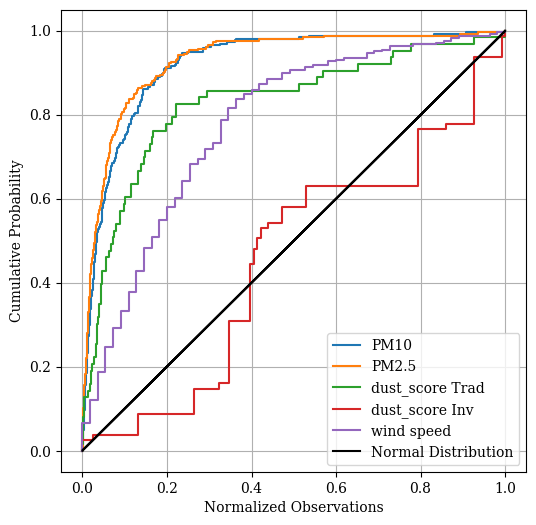

In [28]:
#ECDFs INVERTED and TRADITIONAL WIND DUSTSCORE SAMPLING METHODS for entirety of study period
#FOR dust_score<380 ONLY! and also BELOW PM thresholds
fig,ax=plt.subplots(figsize=(6,6))
pm25_threshold=np.percentile(tceq_pm25_all,99)
pm10_threshold=np.percentile(tceq_pm10_all,99)
dust_inv_threshold=np.percentile(ellipse_inv_hourly_totals,99)
dust_trad_threshold=np.percentile(ellipse_trad_hourly_totals,99)
wind_threshold=np.percentile(wind_years_valuesonly,99)
#normalize all data
dust_trad_norm=normalize(ellipse_trad_hourly_totals[ellipse_trad_hourly_totals>dust_trad_threshold])
dust_inv_norm=normalize(ellipse_inv_hourly_totals[ellipse_inv_hourly_totals>dust_inv_threshold])
tceq_cams49_pm10_norm = normalize(tceq_pm10_all[tceq_pm10_all>pm10_threshold])
tceq_cams49_pm25_norm = normalize(tceq_pm25_all[tceq_pm25_all>pm25_threshold])
wind_spd_norm=normalize(wind_years_valuesonly[wind_years_valuesonly>wind_threshold])

ecdf1 = ECDF(tceq_cams49_pm10_norm)
ecdf2 = ECDF(tceq_cams49_pm25_norm)
ecdf3=ECDF(dust_trad_norm)
ecdf4=ECDF(dust_inv_norm)
ecdf5=ECDF(wind_spd_norm)

ax.step(ecdf1.x, ecdf1.y, where='post',label='PM10')
ax.step(ecdf2.x, ecdf2.y, where='post', label='PM2.5')
ax.step(ecdf3.x, ecdf3.y, where='post', label='dust_score Trad')
ax.step(ecdf4.x, ecdf4.y, where='post', label='dust_score Inv')
ax.step(ecdf5.x, ecdf5.y, where='post', label='wind speed')

x=normalize(np.linspace(0,100,1000))
ecdf_normdist = ECDF(x)
ax.step(ecdf_normdist.x, ecdf_normdist.y, where='post', label='Normal Distribution', color='black')

ax.set_ylabel("Cumulative Probability")
ax.set_xlabel("Normalized Observations")
ax.legend(loc='lower right')
ax.grid()


elements=[dust_trad_norm,dust_inv_norm,tceq_cams49_pm10_norm,tceq_cams49_pm25_norm,wind_spd_norm,x]
df_corr_table=get_ed_table(elements)
corr_mask_matrix = np.tril(df_corr_table)

Text(0.5, 1.0, 'Energy Distances for Data below 80th Percentile')

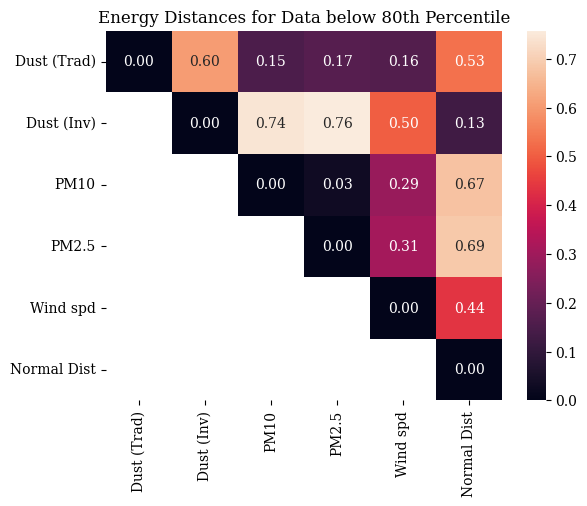

In [29]:
ax_heat_lower=sns.heatmap(df_corr_table, annot=True, mask=corr_mask_matrix, fmt='.2f')
ax_heat_lower.set_title('Energy Distances for Data below 80th Percentile')

In [ ]:
print("N (Inv)= ",ellipse_inv_hourly_totals.size)
print("N (Trad)= ",ellipse_trad_hourly_totals.size)
print("Nunique (Inv)= ",np.unique(ellipse_inv_hourly_totals.round(decimals=4)).size)
print("Nunique (Trad)= ",np.unique(ellipse_trad_hourly_totals.round(decimals=4)).size)

In [30]:
hist, edges = np.histogram(dust_trad_ecdf)
freq = hist / float(hist.sum())
width = np.diff(edges) # edges is bins
plt.bar(edges[1:], freq, width=width, align="edge", ec="k")
plt.xlabel('x')
plt.ylabel('frequency')

NameError: name 'dust_trad_ecdf' is not defined